# 1. Introduction

Name : Monica M. Pratiwi

Batch : FTDS-016-RMT

About the Dataset :  This assignment is using 'Uber and Lyft Dataset Boston, MA' from [Kaggle](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma). According to the website, this dataset is a sample dataset for Uber & Lyft price pings.



**Objective** 
<br>
The objective of this assignment is create a model to predict the price of ride-hailing trip using linear regression.

# 2. Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import joblib
import json
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install geopandas
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.5 MB/s 
     |████████████████████████████████| 16.6 MB 138 kB/s 
     |████████████████████████████████| 7.8 MB 4.8 MB/s 


# 3. Data Loading

In [ ]:
# Mount Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Loading Dataset

data = pd.read_csv('/content/drive/MyDrive/rideshare_kaggle.csv')
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [ ]:
# Duplicate Dataset

data_2 = data.copy()

This dataset has many columns and not all of them shown in the preview. The unseen columns are from after 'cab_type' column until before 'precipIntensityMax' column.

In [ ]:
# show the hidden columns
data.iloc[:, 10:30]

,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime
0,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800
1,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600
2,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000
3,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800
4,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800
693067,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800
693068,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800
693069,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800


In [ ]:
# Check Dataset - 2

data.shape

(693071, 57)

There are more than 690000 rows and 57 columns in this dataset.

In [ ]:
# Data Summary

data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Based on this summary, the average of passengers use the service at 11 am (around lunch time) with 2.18 miles average distance. 

In [ ]:
# Check Dataset - 4

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

There are 57 columns in this dataset. The data type of 29 columns are float, 17 columns are integer, and 11 columns are object. There are some missing values on the 'price' column. The missing value will be handled later.

In [ ]:
# Sort Data by Date and Time

data.sort_values(by=['datetime'])

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
66422,a7b50600-c6c5-4e6c-bea9-4487344196d4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North Station,Haymarket Square,Uber,...,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
446073,9962f244-8fce-4ae9-a583-139d5d7522e1,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Theatre District,North End,Uber,...,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
184332,4aa68a5d-abc0-4fdf-a47f-0003617afbae,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
167114,ef8b695c-c24d-4ac1-b3fe-4aa1a7ed79f4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Boston University,Beacon Hill,Lyft,...,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
184333,89f35ef7-7129-483d-b3e6-d89afdf6946d,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34918,e299c3bf-a429-4b19-af4a-ebd8e9ad74f7,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Financial District,Haymarket Square,Uber,...,0.0029,1545152400,23.11,1545192000,37.99,1545109200,11.82,1545134400,31.84,1545109200
215397,20caa061-2ded-49f8-882b-1e7eae6285ff,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Fenway,Theatre District,Uber,...,0.0029,1545152400,23.11,1545192000,37.99,1545109200,11.82,1545134400,31.84,1545109200
166550,7f1cbf41-2136-4e37-889d-dd0dfff02d38,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Haymarket Square,Back Bay,Uber,...,0.0029,1545152400,23.11,1545192000,37.99,1545109200,11.82,1545134400,31.84,1545109200
290785,8c28dc35-c4a8-41e8-abe8-d5d65849448d,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Northeastern University,Beacon Hill,Lyft,...,0.0029,1545152400,23.11,1545192000,37.99,1545109200,11.82,1545134400,31.84,1545109200


After sorting the data to create a chronological order, the information obtained is the Data is collected from 26-11-2018 at 03:40:46 until 18-12-2018 at 19:15:10.

# 4. Exploratory Data Analysis (EDA)

In [ ]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

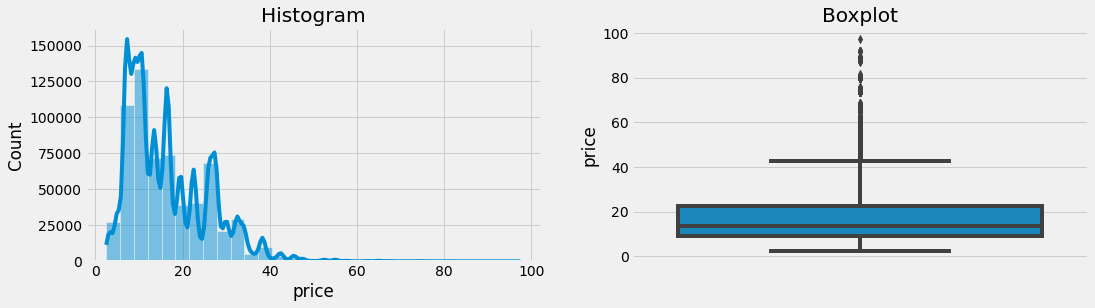


Skewness Value :  1.0457470560899256


In [ ]:
# Distribution of `price`
diagnostic_plots(data, 'price')
print('\nSkewness Value : ', data['price'].skew())

Price data has quite a variety of values and frequencies. The data has a skewness value of 1.04 which considered does not have a normal distribution and appears to have an outlier on the right side.

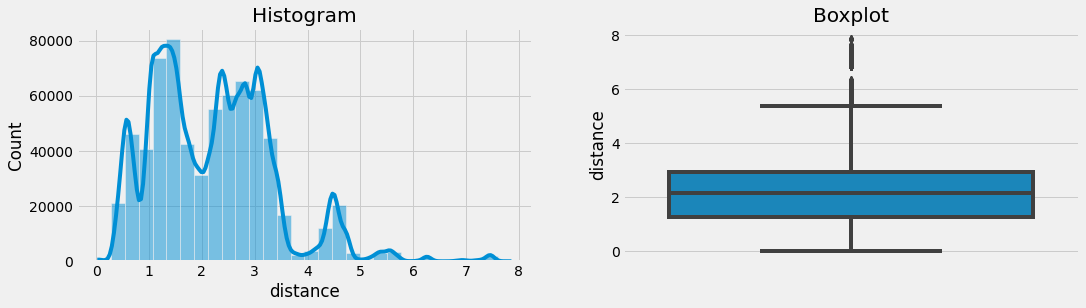


Skewness Value :  0.8343950077972692


In [ ]:
# Distribution of `distance`
diagnostic_plots(data, 'distance')
print('\nSkewness Value : ', data['distance'].skew())

The 'distance' data has skewness value 0.83 and therefore considered as not distributed normally. It has outliers on the right side.

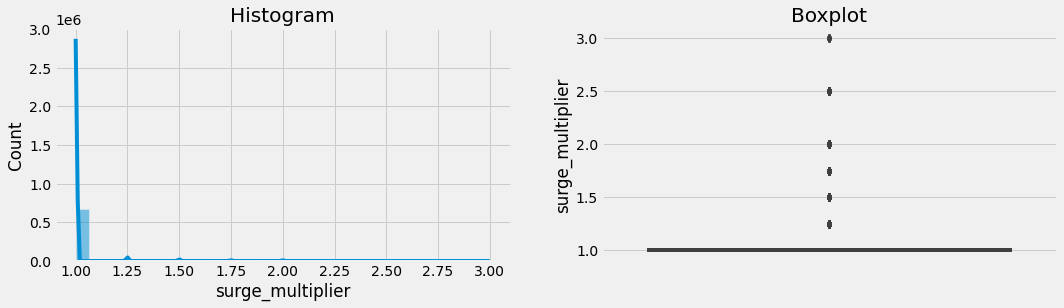


Skewness Value :  8.32024804653164


In [ ]:
# Distribution of `surge_multiplier`
diagnostic_plots(data, 'surge_multiplier')
print('\nSkewness Value : ', data['surge_multiplier'].skew())

The 'surge multiplier' values are between 0 to 3 with 0.25 range.

<Figure size 1080x432 with 0 Axes>

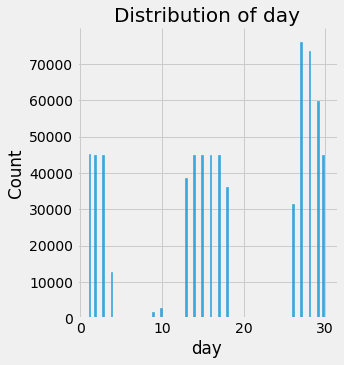

In [ ]:
# Distribution of day

plt.figure(figsize=(15,6))
sns.displot(data['day'])
plt.title('Distribution of day', fontsize = 20)
plt.show()

There are certain days when the data is not available: 5-8, 11-12, and 18-25.

Text(0.5, 1.0, 'Comparison of Service Type')

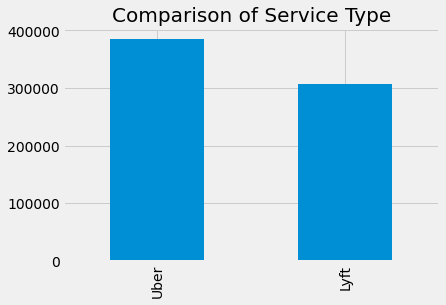

In [ ]:
# Value counts of `cab_type`
data['cab_type'].value_counts().plot(kind="bar")
plt.title('Comparison of Service Type', fontsize = 20)

There are two major ride-hailing companies in this data, Uber and Lyft. Based on the bar plot, the available service mostly provided by Uber. Now, which service belongs to Uber and Lyft?

In [ ]:
# Grouping which service belong to Lyft and Uber

data.groupby(['cab_type', 'name']).size()

cab_type  name        
Lyft      Lux             51235
          Lux Black       51235
          Lux Black XL    51235
          Lyft            51235
          Lyft XL         51235
          Shared          51233
Uber      Black           55095
          Black SUV       55096
          Taxi            55095
          UberPool        55091
          UberX           55094
          UberXL          55096
          WAV             55096
dtype: int64

Based on the grouping, there are 6 services owned by Lyft: Lux, Lux Black, Lux Black XL, Lyft, Lyft XL, and Shared. Uber owns 7 services: Black, Black SUV, Taxi, UberPool, UberX, UberXL, and WAV. Below is the bar chart for better visualization.

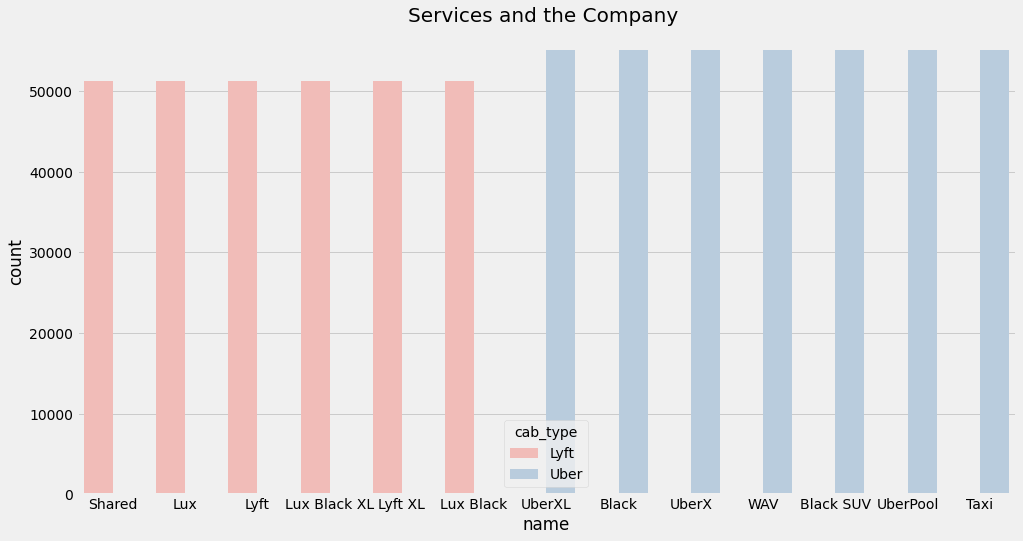

In [ ]:
# Distribution of Type of Service and the Company where it belongs to 

plt.figure(figsize=(15,8))
sns.countplot(data=data, x="name", hue="cab_type", palette='Pastel1')
plt.title('Services and the Company ', fontsize = 20)
plt.show()

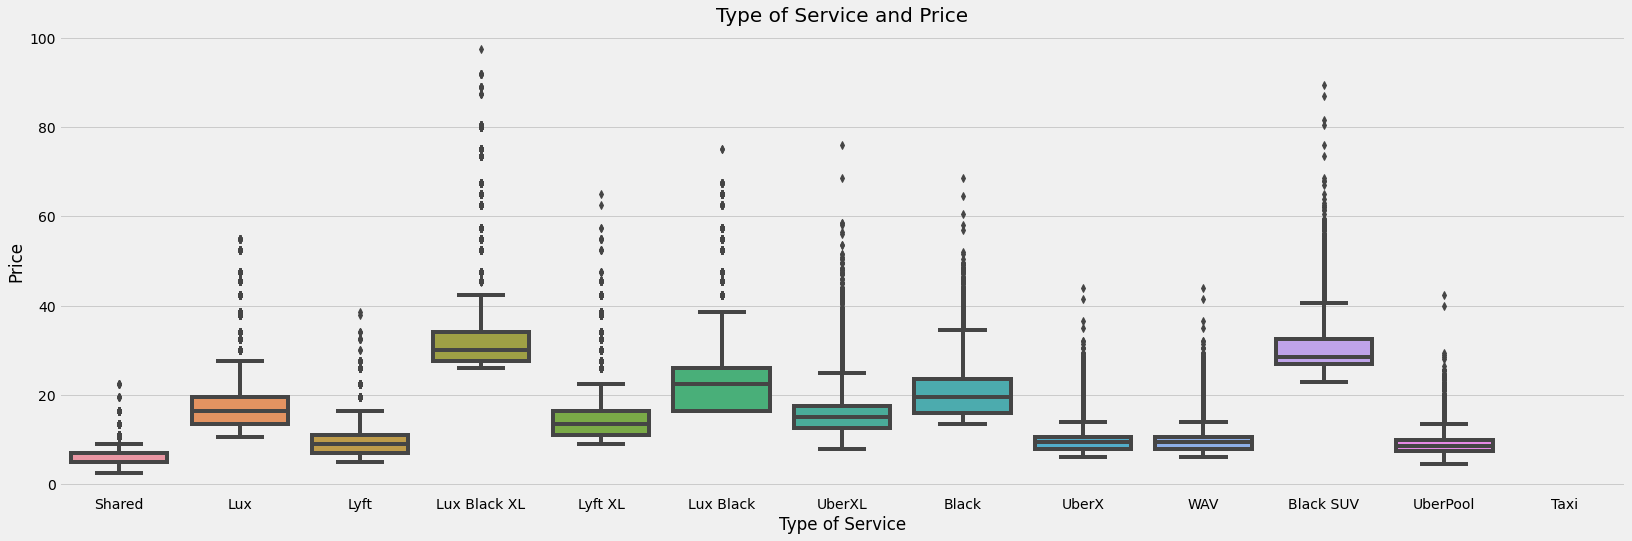

In [ ]:
# Product Category and Purchase
x = data['name']
y = data['price']

plt.figure(figsize=(25,8))
sns.boxplot(x, y)
plt.title('Type of Service and Price', fontsize = 20)
plt.xlabel('Type of Service')
plt.ylabel('Price')
plt.show()

The box plot indicates that Lux Black XL is the most expensive service and shared is the cheapest service. There is no information for Taxi service, indicates the missing value might concentrated on this service. 

In [ ]:
# Grouping Source

data['source'].value_counts()

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64

Passengers are picked up from 12 locations in Boston with Financial District is the most popular pick up place.

In [ ]:
# Recap the destination and source
data.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination source                                       
Back Bay    Boston University        42.336904 -71.066127
            Fenway                   42.337840 -71.065812
            Haymarket Square         42.337070 -71.065139
            North End                42.338142 -71.066312
            Northeastern University  42.336810 -71.065419
...                                        ...        ...
West End    Fenway                   42.338440 -71.066429
            Haymarket Square         42.339464 -71.066280
            North End                42.337216 -71.066243
            Northeastern University  42.340173 -71.066657
            South Station            42.339025 -71.066998

[72 rows x 2 columns]

In [ ]:
# Visualize source location with map
df1 = data[data['source']=='Haymarket Square']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

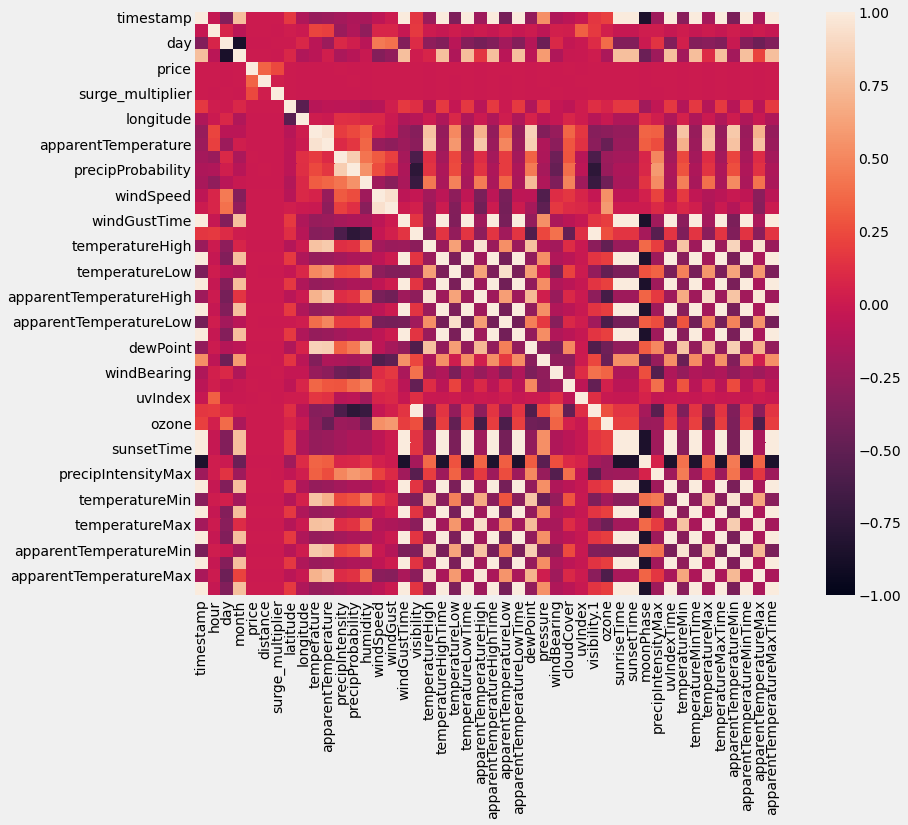

In [ ]:
# Correlation Heatmap
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(),vmin=-1, vmax=1, square=True);

Based on the correlation heatmap, the brighter the color, the higher the correlation. Some features have high positive correlation with the others such as timestamp and month, windGustTime, temperatureHighTime, sunriseTime, sunsetTime, etc. distance, price, and surge_multiplier have no correlation with almost all features. There are also features with negative correlation toward others, such as timestamp and moonPhase. Features that have high correlation with price are distance and surge_multiplier. 

# 5. Data Preprocessing 

In [3]:
# Get data for model inference

data_inf = data.sample(15, random_state=93)

In [4]:
# Remove inference set from dataset

data_train_test = data.drop(data_inf.index)

In [5]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## Splitting Between X (Feature) and y (Target)

In order to predict the price, the 'price' column must be set as the target while other columns will be the feature. The feature and the target must be separated.

In [6]:
# Splitting between `X ` AND `y`

X = data_train_test.drop(['price'], axis=1) 
y = data_train_test['price']

After splitting X and y, each of them will be separated into train and test set. The train set has the bigger portion than the test set because the model need to learn a lot of data.

In [7]:
# Splitting between Train-Set dengan Test-Set with scikit learn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33) 

print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (464347, 56)
Test Size:  (228709, 56)


The test set size is adjusted to 33%. Random state is set to control the randomness so that the results that can be reproduced.

## Handling Outlier

Outlier treatment will be conducted towards the features with highest correlation with the target (distance and surge multiplier). Since 'surge_multiplier' only between 1 to 3 with 0.25 range, outlier handling is considered not necessary.

In [8]:
# Function to find upper and lower boundaries for skewed distributed variables

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [9]:
# Boundaries IQR * 1.5, for `distance` in the X_train dataset
distance_upper_boundary, distance_lower_boundary = find_skewed_boundaries(X_train, 'distance', 1.5)
distance_upper_boundary, distance_lower_boundary

# Boundaries IQR * 1.5, for `surge_multiplier` in the X_train dataset
surge_multiplier_upper_boundary, surge_multiplier_lower_boundary = find_skewed_boundaries(X_train, 'surge_multiplier', 1.5)
surge_multiplier_upper_boundary, surge_multiplier_lower_boundary

print('distance_upper_boundary : ', distance_upper_boundary)
print('distance_lower_boundary : ', distance_lower_boundary, '\n')
print('surge_multiplier_upper_boundary : ', surge_multiplier_upper_boundary)
print('surge_multiplier_lower_boundary : ', surge_multiplier_lower_boundary)


distance_upper_boundary :  5.38
distance_lower_boundary :  -1.18 

surge_multiplier_upper_boundary :  1.0
surge_multiplier_lower_boundary :  1.0


In [10]:
# Flag the outliers in category `distance`
outliers_distance = np.where(X_train['distance'] > distance_upper_boundary, True,
                    np.where(X_train['distance'] < distance_lower_boundary, True, False))

In [11]:
# Let's trim the dataset

X_train_trimmed = X_train.loc[~(outliers_distance)]
print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_trimmed.shape)

Size dataset - Before trimming :  (464347, 56)
Size dataset - After trimming  :  (458548, 56)


## Handling Missing Values

Based on the data information on the 'Data Loading' section, the missing values can be found in 'price' which is the target in this assignment. Since the data already separated into train, test, and inference, all three of them must be check whether they contain missing value or not.

In [12]:
# Check Missing Values in `y_train`
y_train.isna().sum()

36886

In [13]:
# Check Missing Values in `y_test`
y_test.isna().sum()

18208

In [14]:
# Checking Missing Values in `data inference`
data_inf.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          1
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

There are 36886 missing values in `y_train`, 18208 missing values in `y_test`, and 1 missing value in 'price' column of data inference. The missing values will be imputed with the median since the 'price' data is not normally distributed.

In [15]:
# Impute missing values with median
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_test.median(), inplace=True)
data_inf.fillna(y_test.median(), inplace=True)

## Feature Selection

To Make a model with good performance, one of the way that can be tried is remove all unnecessary feature.

In [16]:
# Display X_train
X_train.head(10).iloc[:, 10:30]

,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow
87621,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,4.48,1.0,42.3398,-71.0892,38.60,32.72,Clear,Partly cloudy throughout the day.,0.000,0.00,0.62,8.30,11.14,1543514400,9.933,45.12,1543510800,28.54
57193,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,5.56,1.0,42.3647,-71.0542,35.54,30.98,Mostly Cloudy,Mostly cloudy throughout the day.,0.000,0.00,0.73,5.31,7.20,1543431600,9.933,42.61,1543438800,37.60
111414,lyft,Lyft,1.38,1.0,42.3505,-71.1054,40.38,35.18,Partly Cloudy,Light rain in the morning.,0.000,0.00,0.71,7.73,11.57,1543305600,10.000,46.74,1543320000,33.82
123031,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2.88,1.0,42.3588,-71.0707,36.53,32.06,Mostly Cloudy,Mostly cloudy throughout the day.,0.000,0.00,0.71,5.42,6.95,1543431600,9.974,42.61,1543438800,37.64
548047,lyft_line,Shared,1.25,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.000,0.00,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71
32409,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1.61,1.0,42.3519,-71.0551,43.00,37.07,Partly Cloudy,Partly cloudy throughout the day.,0.000,0.00,0.54,10.72,14.22,1543514400,9.931,44.76,1543510800,28.78
357946,lyft_luxsuv,Lux Black XL,0.56,1.0,42.3505,-71.1054,54.59,54.59,Mostly Cloudy,Foggy in the morning.,0.000,0.00,0.63,9.43,15.07,1543856400,10.000,56.89,1543852800,33.73
306373,lyft,Lyft,3.49,1.0,42.3429,-71.1003,42.81,38.23,Overcast,Rain throughout the day.,0.002,0.29,0.75,7.54,8.94,1545015600,9.956,43.63,1544990400,34.00
476860,lyft_premier,Lux,0.44,1.0,42.3505,-71.1054,41.40,41.40,Foggy,"Rain until morning, starting again in the eve...",0.000,0.00,0.92,1.81,1.81,1543287600,0.965,46.39,1543255200,42.15
413069,lyft_premier,Lux,3.43,1.0,42.3505,-71.1054,41.60,39.31,Overcast,Partly cloudy throughout the day.,0.000,0.00,0.81,3.84,3.84,1544846400,9.768,46.70,1544814000,40.93


Based on the information from Lyft and Uber website, it can be said that things that can affected the price of their service and available on the dataset are: the kind of service (represented by `name` on the dataset), distance (represented by `distance` on the dataset), and surge pricing (represented by `surge_multiplier` on the dataset). The correlation that was conducted earlier shown that `name` has no correlation with `price`. It is because `name` is a categorical features and correlation only can read numerical feature. [link for Uber](https://www.uber.com/us/en/marketplace/pricing/)

In [17]:
# Select only the features that have the most impact on `price`
X_train = X_train.filter(['name','distance','surge_multiplier'], axis=1)
X_test = X_test.filter(['name','distance','surge_multiplier'], axis=1)
X_train

,name,distance,surge_multiplier
87621,UberX,4.48,1.0
57193,Taxi,5.56,1.0
111414,Lyft,1.38,1.0
123031,Taxi,2.88,1.0
548047,Shared,1.25,1.0
...,...,...,...
196665,Black SUV,0.63,1.0
158921,Black SUV,0.55,1.0
223890,Lyft,1.91,1.0
393794,Black SUV,2.66,1.0


## Split between Numerical columns and Categorical Columns

It has been mentioned earlier that categorical features can't be processed without any preprocessing. So, the data must be split first between numerical and categorical.

In [18]:
# Define Numerical columns and Categorical Column

num_columns_norm = ['distance']
num_columns_skew = ['surge_multiplier']
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns with Normal Distribution: ', num_columns_norm)
print('Numerical Columns with Skewed Distribution: ', num_columns_skew)
print('Categorical Columns: ', cat_columns)

Numerical Columns with Normal Distribution:  ['distance']
Numerical Columns with Skewed Distribution:  ['surge_multiplier']
Categorical Columns:  ['name']


In [19]:
# Split Train-Set and Test-Set based on Column Types

X_train_num_norm = X_train[num_columns_norm]
X_test_num_norm = X_test[num_columns_norm]

X_train_num_skew = X_train[num_columns_skew]
X_test_num_skew = X_test[num_columns_skew]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]


## Scaling and Encoding

Numerical features in this data also varies from small to large number. it needs to be scaled so the data can be on the same level between each other.

In [20]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num_skew)

X_train_num_scaled = scaler.transform(X_train_num_skew)
X_test_num_scaled = scaler.transform(X_test_num_skew)
X_train_num_scaled

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [21]:
# Feature Scaling using StandardScaler

standard = StandardScaler()
standard.fit(X_train_num_skew)

X_train_num_standard = scaler.transform(X_train_num_norm)
X_test_num_standard = scaler.transform(X_test_num_norm)
X_train_num_standard

array([[ 1.74 ],
       [ 2.28 ],
       [ 0.19 ],
       ...,
       [ 0.455],
       [ 0.83 ],
       [-0.305]])

For the scaler, the 'surge_multiplier' feature is not normally distributed so MinMaxScaler is used. For 'distance' that already has normal distribution is scaled using Standard Scaler.

For categorical feature, the feature needs to be encoded.

Uber and Lyft each have tiers based on the type of service used. But it is not known whether one service on Lyft is equivalent to which one on Uber or which is the better service of the two if ranked. So, it is decided to use One Hot Encoder.

In [22]:
# Feature Encoding

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_cat_enc = ohe.fit_transform(X_train_cat)
X_test_cat_enc = ohe.transform(X_test_cat)
X_train_cat_enc

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

After the categorical data has been encoded and numerical features has been scaled, the features then concatenated as it was.

In [23]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_num_standard, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_num_standard, X_test_cat_enc], axis=1)
X_train_final

array([[ 0.   ,  1.74 ,  0.   , ...,  1.   ,  0.   ,  0.   ],
       [ 0.   ,  2.28 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.19 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.455,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.83 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , -0.305,  0.   , ...,  1.   ,  0.   ,  0.   ]])

# 6. Linear Regression

Linear Regression with default parameter is used in this model. After define the model, the model then is fitted with training data.

In [24]:
# Define the model

linreg = LinearRegression()

In [25]:
# Fit the model for training

linreg.fit(X_train_final, y_train)

LinearRegression()

In [26]:
# Model Prediction

y_pred_train = linreg.predict(X_train_final)
y_pred_test = linreg.predict(X_test_final)

In [27]:
# Show the prediction result

y_pred_train

array([15.62157886, 22.10467653,  6.85246929, ...,  8.20698711,
       31.48728619,  5.16879038])

In [28]:
# Model Evaluation using MAE, MSE, RMSE, R2 Score

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  1.8181532223634005
MAE test =  1.82244179264
MSE train =  6.589257022227297
MSE test =  6.652460319772107
RMSE train =  2.56695481499525
RMSE test =  2.5792363830738947
r2score train =  0.9182197581714259
r2score test =  0.91786288551291


Mean Average Error: average differences between predicted values and actual values. On average, the gap between the predicted value and the actual value in the test data is 1.82, slightly higher than the gap in the train data thich has 1.81 Mean Average Error.
<br>

Mean Squared Error: the average of the square of the difference between the actual and predicted values. The root mean square in the test data is 6.65, slightly higher than the train data with 6.58.
<br>

Root Mean Squared Error: the root of mean squared error. The root mean square of test data is 2.57, slightly higher than the train data as well.
<br>

With r2 score in the test data is 0.91, meaning that the model explains 91% of the fitted data in the regression.
<br>

The overall model performance is good but it still can be improved.

# 7. Polynomial Features

Polynomial Features are created by raising existing features to an exponent. Polynomial Features Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

In [29]:
# Preprocess using PolynomialFeatures

poly = PolynomialFeatures()

In [30]:
# Fit and Transform PolynomialFeatures to train data

poly_features = poly.fit_transform(X_train_final)

In [31]:
# Transform PolynomialFeatures to test data

poly_feature_test = poly.transform(X_test_final)

In [32]:
# Define Linear Regression and fit the polynomial features model with linear regression

poly_model = LinearRegression()
poly_model.fit(poly_features,y_train)

LinearRegression()

In [33]:
# Predict model

poly_predict_train = poly_model.predict(poly_features)
poly_predict_test = poly_model.predict(poly_feature_test)

In [34]:
# Show prediction result

poly_predict_test

array([38.63427734,  6.27001953, 10.38696289, ...,  7.15087891,
       21.25292969, 10.51733398])

In [35]:
# Model Evaluation using MAE, MSE, RMSE, R2 Score

print('MAE train = ', mean_absolute_error(y_train, poly_predict_train))
print('MAE test = ', mean_absolute_error(y_test, poly_predict_test))

print('MSE train = ', mean_squared_error(y_train, poly_predict_train))
print('MSE test = ', mean_squared_error(y_test, poly_predict_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, poly_predict_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, poly_predict_test)))

print('r2score train = ', r2_score(y_train, poly_predict_train))
print('r2score test = ', r2_score(y_test, poly_predict_test))

MAE train =  1.2035623560310231
MAE test =  1.2008827646089026
MSE train =  3.3068589475895185
MSE test =  3.3160222262752086
RMSE train =  1.818477095701103
RMSE test =  1.8209948452083022
r2score train =  0.9589580853327463
r2score test =  0.9590574788651076


Using Polynomial Feature, the model performance is improved, shown by lower mean absolute error, reduce mean square error by almost a half thus also reduce root mean square error, and increase r2 score to 95%.

Another model will be tried to see whether the model performance can be better.

# 8. Ridge Regression

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization.

In [36]:
# Define the model

ridge_model = Ridge(alpha=1000)

Alpha in Ridge Regression denotes the amount of shrinkage (or constraint) that will be implemented in the equation.

In [37]:
# Fit the model to the training data

ridge_model.fit(X_train_final, y_train)

Ridge(alpha=1000)

In [38]:
# Predict the train and test data

ridge_pred_train = ridge_model.predict(X_train_final)
ridge_pred_test = ridge_model.predict(X_test_final)

In [39]:
# Predicted result

ridge_pred_test

array([35.94855279,  6.91509365, 11.09030986, ...,  5.39422413,
       20.14121569, 11.26830898])

In [40]:
# Model Evaluation using MAE, MSE, RMSE, R2 Score

print('MAE train = ', mean_absolute_error(y_train, ridge_pred_train))
print('MAE test = ', mean_absolute_error(y_test, ridge_pred_test))

print('MSE train = ', mean_squared_error(y_train, ridge_pred_train))
print('MSE test = ', mean_squared_error(y_test, ridge_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, ridge_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, ridge_pred_test)))

print('r2score train = ', r2_score(y_train, ridge_pred_train))
print('r2score test = ', r2_score(y_test, ridge_pred_test))

MAE train =  1.8417356498348492
MAE test =  1.8470811539810594
MSE train =  7.351678213567675
MSE test =  7.45094785801845
RMSE train =  2.711397833879727
RMSE test =  2.7296424414231346
r2score train =  0.9087572361916761
r2score test =  0.9080040574714221


Using Ridge Regression, the model performance does not improved from the previous model.

# 9. Lasso Regression

Lasso is a regression analysis method that performs both variable selection and regularization. The LASSO method regularizes model parameters by shrinking the regression coefficients, reducing some of them to zero. Lasso regression algorithm is defined as a regularization algorithm that assists in the elimination of irrelevant parameters.

In [41]:
# Define the model

lasso_model = Lasso()

In [42]:
# Fit the model into the train data

lasso_model.fit(X_train_final,y_train)

Lasso()

In [43]:
# Predict the data

lasso_pred_train = lasso_model.predict(X_train_final)
lasso_pred_test = lasso_model.predict(X_test_final)

In [44]:
# Model Evaluation using MAE, MSE, RMSE, R2 Score
print('MAE train = ', mean_absolute_error(y_train, lasso_pred_train))
print('MAE test = ', mean_absolute_error(y_test, lasso_pred_test))

print('MSE train = ', mean_squared_error(y_train, lasso_pred_train))
print('MSE test = ', mean_squared_error(y_test, lasso_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, lasso_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, lasso_pred_test)))

print('r2score train = ', r2_score(y_train, lasso_pred_train))
print('r2score test = ', r2_score(y_test, lasso_pred_test))

MAE train =  6.521950334217808
MAE test =  6.533379185098413
MSE train =  65.20095612884585
MSE test =  65.5376492579229
RMSE train =  8.074710900635752
RMSE test =  8.095532672895768
r2score train =  0.1907813063469035
r2score test =  0.19081465479569026


Using Lasso also doesn't improve the previous model and make it worse instead with higher errors and has the lowest r2 score.

From there, the best model is linear regression with polynomial features.

# 10. Model Inference

In [45]:
# Save the Files

import joblib
import json

with open('model_poly.pkl', 'wb') as file_1:
  joblib.dump(poly, file_1)

with open('model_lin_reg.pkl', 'wb') as file_2:
  joblib.dump(poly_model, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  joblib.dump(scaler, file_3)

with open('model_standard_scaler.pkl', 'wb') as file_4:
  joblib.dump(standard, file_4)

with open('model_enc.pkl', 'wb') as file_5:
  joblib.dump(ohe, file_5)

with open('list_num_cols_norm.txt', 'w') as file_6:
  json.dump(num_columns_norm, file_6)

with open('list_num_cols_skew.txt', 'w') as file_7:
  json.dump(num_columns_skew, file_7)

with open('list_cat_cols.txt', 'w') as file_8:
  json.dump(cat_columns, file_8)

In [46]:
# Load All Files

import joblib
import json

with open('model_poly.pkl', 'rb') as file_1:
  poly = joblib.load(file_1)

with open('model_lin_reg.pkl', 'rb') as file_2:
  poly_model = joblib.load(file_2)

with open('model_scaler.pkl', 'rb') as file_3:
  scaler = joblib.load(file_3)

with open('model_standard_scaler.pkl', 'rb') as file_4:
  standard = joblib.load(file_4)

with open('model_enc.pkl', 'rb') as file_5:
  ohe = joblib.load(file_5)

with open('list_num_cols_norm.txt', 'r') as file_6:
  num_columns_norm = json.load(file_6)

with open('list_num_cols_skew.txt', 'r') as file_7:
  num_columns_skew = json.load(file_7)

with open('list_cat_cols.txt', 'r') as file_8:
  cat_columns = json.load(file_8)

In [ ]:
# Display Inference Set

data_inf.head(2)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,90b7bb1e-1363-4a5e-8e74-174d837455d2,1.545059e+09,15,17,12,2018-12-17 15:10:12,America/New_York,Haymarket Square,Financial District,Lyft,...,0.0175,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.95,1545076800
1,3230804a-a4a5-4d69-9fd6-a5d9e2e1cdb6,1.543531e+09,22,29,11,2018-11-29 22:37:56,America/New_York,South Station,West End,Lyft,...,0.0000,1543510800,35.07,1543550400,44.68,1543510800,30.92,1543550400,38.34,1543510800


In [ ]:
# Split between Numerical Columns and Categorical Columns

data_inf_num_norm = data_inf[num_columns_norm]
data_inf_num_skew = data_inf[num_columns_skew]
data_inf_cat = data_inf[cat_columns]

In [ ]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = scaler.transform(data_inf_num_skew)
data_inf_num_standard = standard.transform(data_inf_num_norm)
data_inf_cat_encoded = ohe.transform(data_inf_cat)

In [ ]:
# Concate Numerical Columns and Categorical Columns

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_num_standard, data_inf_cat_encoded], axis=1)

In [ ]:
data_inf_poly = poly.transform(data_inf_final)

In [ ]:
# Predict

y_pred_inf = poly_model.predict(data_inf_poly)
y_pred_inf

array([  4.46142578, 112.9987793 ,  89.82519531, 130.32397461,
       116.99511719, -14.31176758, 115.23681641, 196.05053711,
        14.80444336, 131.78442383,  19.75683594,  68.08764648,
       136.75097656,  55.88647461,   7.23754883])

In [ ]:
# Create DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price_Prediction'])
y_pred_inf_df.head()

,Price_Prediction
0,4.461426
1,112.998779
2,89.825195
3,130.323975
4,116.995117


In [ ]:
# Concate between Inference-Set and Rating's Prediction

fin = pd.concat([data_inf, y_pred_inf_df], axis=1)
fin.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Price_Prediction
10,fe0f1477-aca4-403f-8c2f-14a5c702d53f,1.543436e+09,20,28,11,2018-11-28 20:11:08,America/New_York,Back Bay,Fenway,Uber,...,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800,19.756836
11,88d805d1-3688-4e00-9690-ae5a0adedcd7,1.544771e+09,7,14,12,2018-12-14 07:00:06,America/New_York,North Station,Fenway,Uber,...,1544806800,27.18,1544781600,46.65,1544814000,24.51,1544785200,43.86,1544817600,68.087646
12,0bf7379e-a2a3-4dfd-a0f2-4a0da479a854,1.545130e+09,10,18,12,2018-12-18 10:50:07,America/New_York,North Station,Northeastern University,Uber,...,1545152400,23.23,1545192000,38.11,1545109200,11.86,1545134400,31.96,1545109200,136.750977
13,c344ca2d-e404-4d67-8714-26edea52720f,1.543605e+09,19,30,11,2018-11-30 19:08:11,America/New_York,Back Bay,Fenway,Lyft,...,1543593600,28.64,1543575600,42.57,1543600800,27.20,1543568400,40.51,1543611600,55.886475
14,8455e72b-6f4a-4fd8-a630-6b8ef822ff88,1.543641e+09,5,1,12,2018-12-01 05:08:02,America/New_York,Haymarket Square,Financial District,Uber,...,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800,7.237549


In [ ]:
# Price and Price Prediction
prices=pd.concat([data_inf['price'], y_pred_inf_df], axis=1)
prices

,price,Price_Prediction
0,3.5,4.461426
1,19.5,112.998779
2,9.0,89.825195
3,10.5,130.323975
4,8.5,116.995117
5,26.0,-14.311768
6,16.5,115.236816
7,17.0,196.050537
8,11.0,14.804443
9,28.5,131.784424


# Conclusion

There are two major ride-hailing companies in this data, Uber and Lyft. Based on the bar plot, the available service mostly provided by Uber. Six services owned by Lyft: Lux, Lux Black, Lux Black XL, Lyft, Lyft XL, and Shared, while Uber owns seven services: Black, Black SUV, Taxi, UberPool, UberX, UberXL, and WAV. The most expensive service is Lux Black XL and Shared is the cheapest service.


The features that most determine the price of a ride-hailing service are name, distance, and surge_multiplier. In this case, after experimenting on several models, the best model is Linear Regression with Polynomial Features with the lowest MAE, MSE, RMSE, and highest R2 Score amongst all.

# Conceptual Problems


Answer the questions:

1. Mention and explain the assumptions used by Linear Regression!


2. Show and interpret the meaning of the coefficient and slope obtained from the model you have built!